# PCA Results Visualization

To run it data should be saved in one folder:
- principal_components.csv - *output of PCA*
- sensor_description.csv - *attribute sdf from class DieselDs from script jems_data.py* 
- components.npy - *attribute of PCA*
- explained_variance_ratio.npy - *attribute of PCA*

[PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

DATA_LOCATION = "results_all/"

In [2]:
class Visualization:
    def __init__(self, data_location, load=True, pc=None, c=None, evr=None):
        self.data_location = data_location
        # load data
        self.sensor_description = pd.read_csv(self.data_location + "sensor_description.csv", index_col=1)
        if(load):
            self.principal_components = pd.read_csv(self.data_location + "principal_components.csv", index_col=0)
            self.components = np.load(self.data_location + "components.npy")
            self.explained_variance_ratio = np.load(self.data_location + "explained_variance_ratio.npy")
        else:
            self.principal_components = pc
            self.components = c
            self.explained_variance_ratio = evr
    
    def draw_variance(self):
        """
        Draw variance for each principal component and cumulative variance
        """
        plt.figure(figsize=(30, 20))
        plt.subplot(211)
        plt.plot(np.arange(1, len(self.explained_variance_ratio)+1), np.cumsum(self.explained_variance_ratio))
        plt.subplot(212)
        plt.bar(np.arange(1, len(self.explained_variance_ratio)+1), self.explained_variance_ratio)
        plt.show()
        
    def draw_matrix(self, num_of_components=10, threshold=0.2, save=None):
        """
        Draw matrix where each column represents one sensor and each row one principal components.
        Only first num_of_components principal components and only sensors which affect more
        than threshold on any component are shown.
        """
        compdf = pd.DataFrame(data=self.components[:num_of_components], columns=self.principal_components.columns)
        
        # select sensors with at least some information
        to_drop = []
        for i in compdf.columns:
            if(compdf[i].abs().lt(threshold).all()):
                to_drop.append(i)
        compdf = compdf.drop(columns=to_drop)
        
        # drop columns describing sensors which doesn't appear in self.sensor_description
        compdf = compdf.drop(columns = compdf.columns.difference(self.sensor_description.index.astype('str')))
        
        # prepare sensor descriptions
        descriptions = ["{} ({})".format(self.sensor_description.loc[int(i), "description"],
                                         self.sensor_description.loc[int(i), "name"])
                        for i in compdf.columns]
        
        # draw matrix
        plt.figure(1, figsize=(0.5*len(compdf.columns)+2, 0.5*compdf.shape[0]+10))
        plt.matshow(compdf.values, fignum=1)
        plt.colorbar(shrink=0.5)
        plt.xticks(range(len(compdf.columns)),descriptions,rotation=65,ha='left')
        
        if(save != None):
            plt.savefig(self.data_location + save, format="png")
        else:
            plt.show()


## Variance

Cumulative variance and variance for each principal component

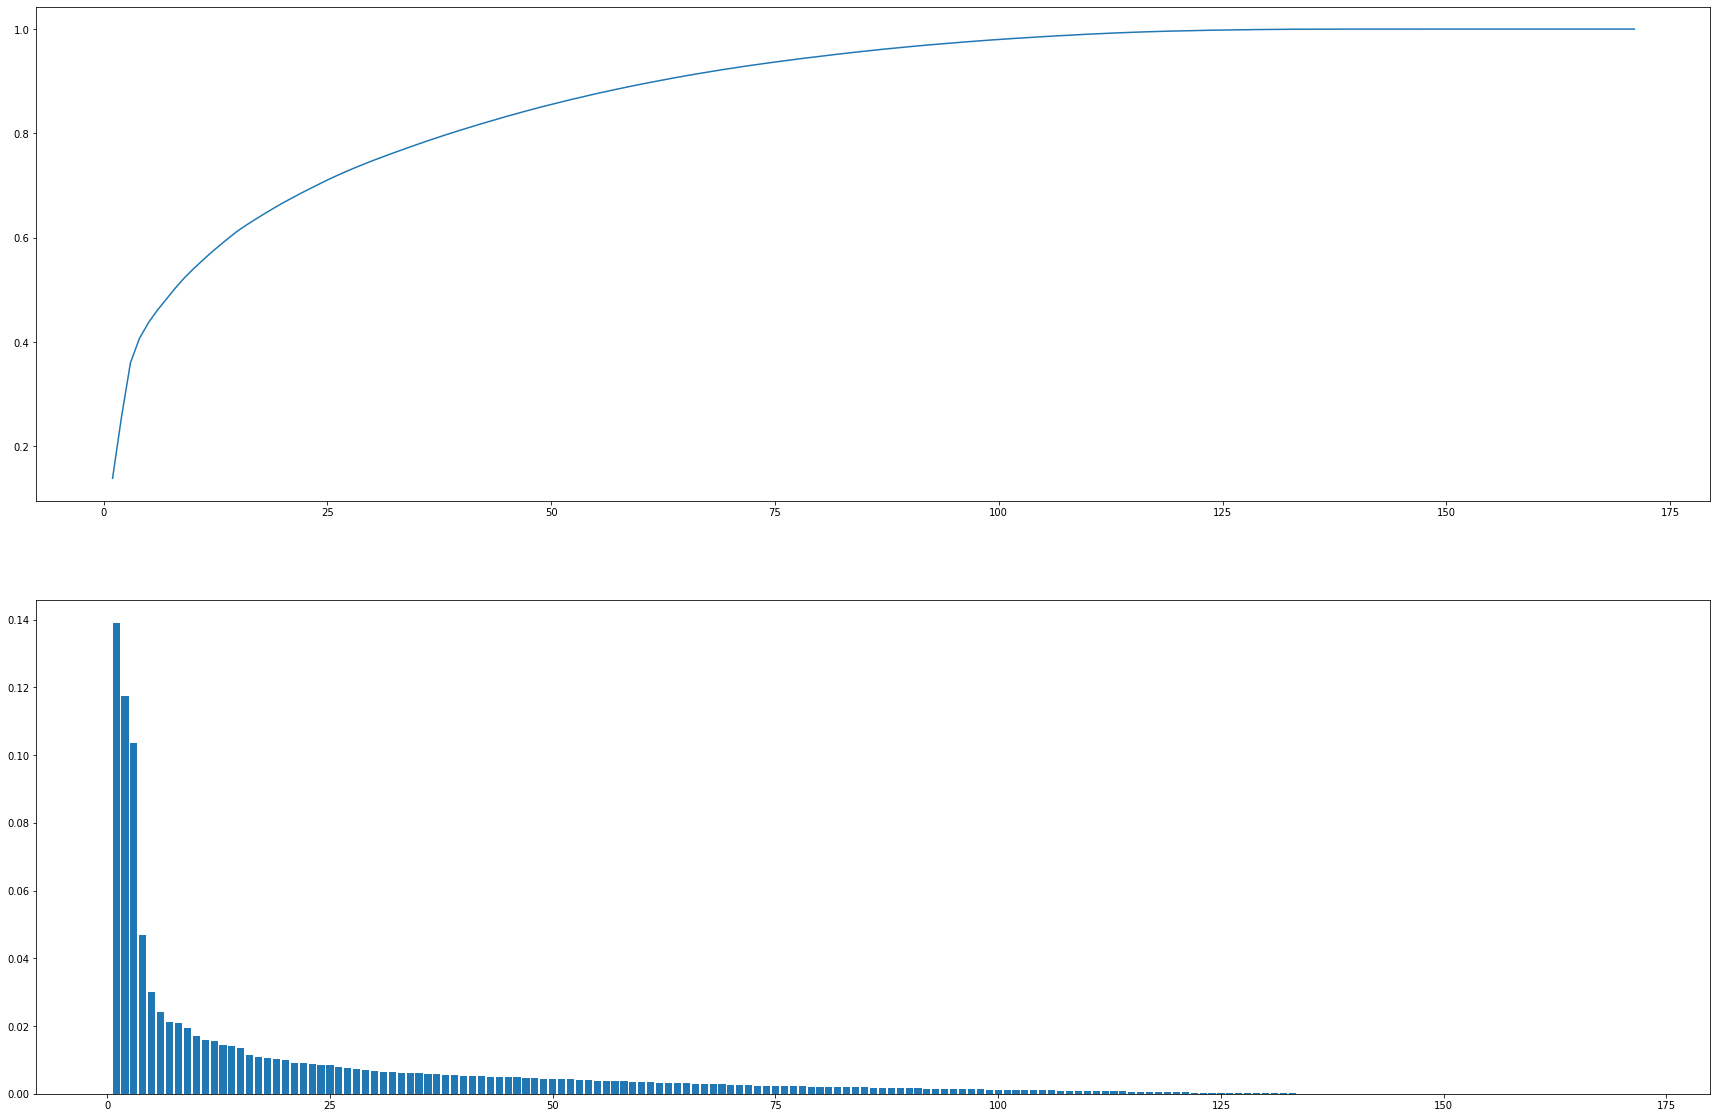

In [3]:
vis = Visualization(DATA_LOCATION)
vis.draw_variance()

## Sensor contribution to principal components

Matrix of sensors that the most contribute to principal components.

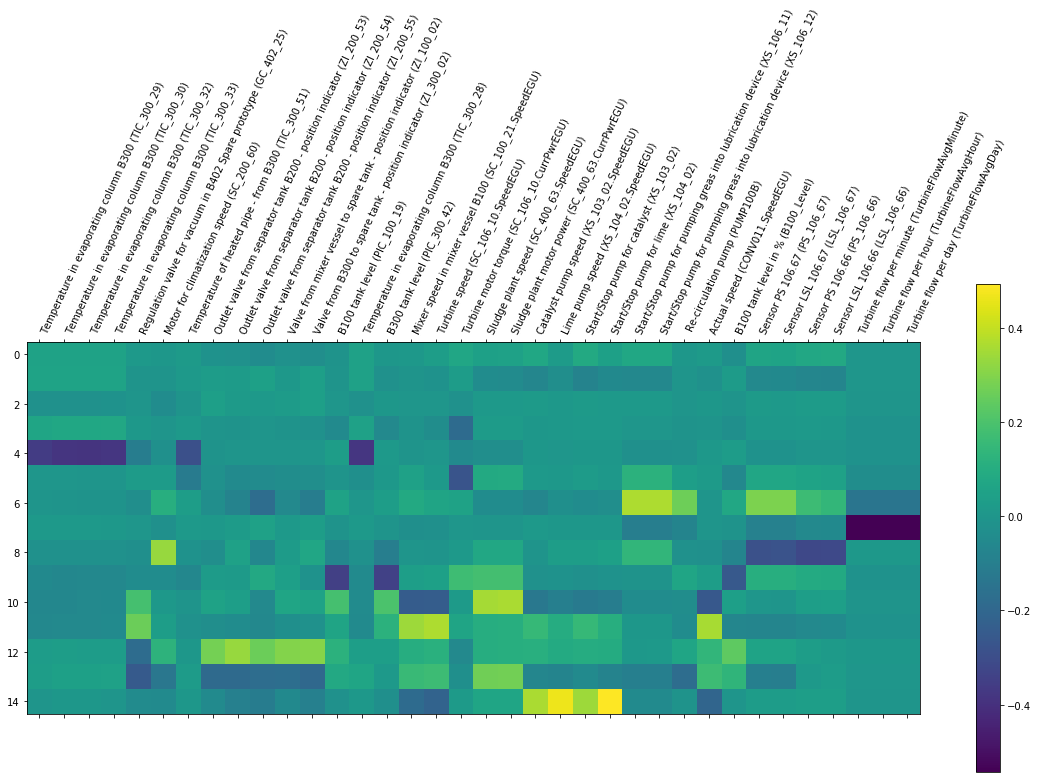

In [4]:
vis.draw_matrix(15, 0.25)

In [5]:
# division of sensors into 3 groups (B100, B200 and B300)
b100 = ['50', '53', '62', '63', '64', '65', '96', '97', '98', '2', '3', '4', '38', '45', '47', '55', '121', '90', '154', '19',
        '20', '85', '117', '99', '100', '101', '115', '118', '102', '103', '104', '116', '119', '37', '108', '109', '110']
b200 = ['6', '7', '8', '9', '10', '11', '12', '13', '17', '31', '32', '33', '34', '35', '36', '39', '49', '52', '56', '58',
        '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '30', '46', '122', '91', '95', '153', '155', '165',
        '166', '167', '1', '18', '105', '106', '107', '21', '22', '86', '125', '23', '24', '25', '87', '126']
b300 = ['14', '15', '16', '40', '48', '51', '57', '61', '77', '78', '79', '80', '81', '26', '27', '28', '29', '41', '59', '88',
        '157', '23', '24', '25', '87', '126']

In [6]:
def pca_for_columns(columns):
    data = pd.read_csv(DATA_LOCATION + "sensor_values_without_nan.csv", index_col=0)
    
    # take only columns in b100
    data = data[columns]

    # standardize the data
    standardized = pd.DataFrame(data = StandardScaler().fit_transform(data),
                                index = data.index, columns = data.columns)

    # PCA
    pca = PCA()
    principal_components = pca.fit_transform(standardized)
    principal_components = pd.DataFrame(data=principal_components, index=data.index, columns=data.columns)
    
    return (pca, principal_components)

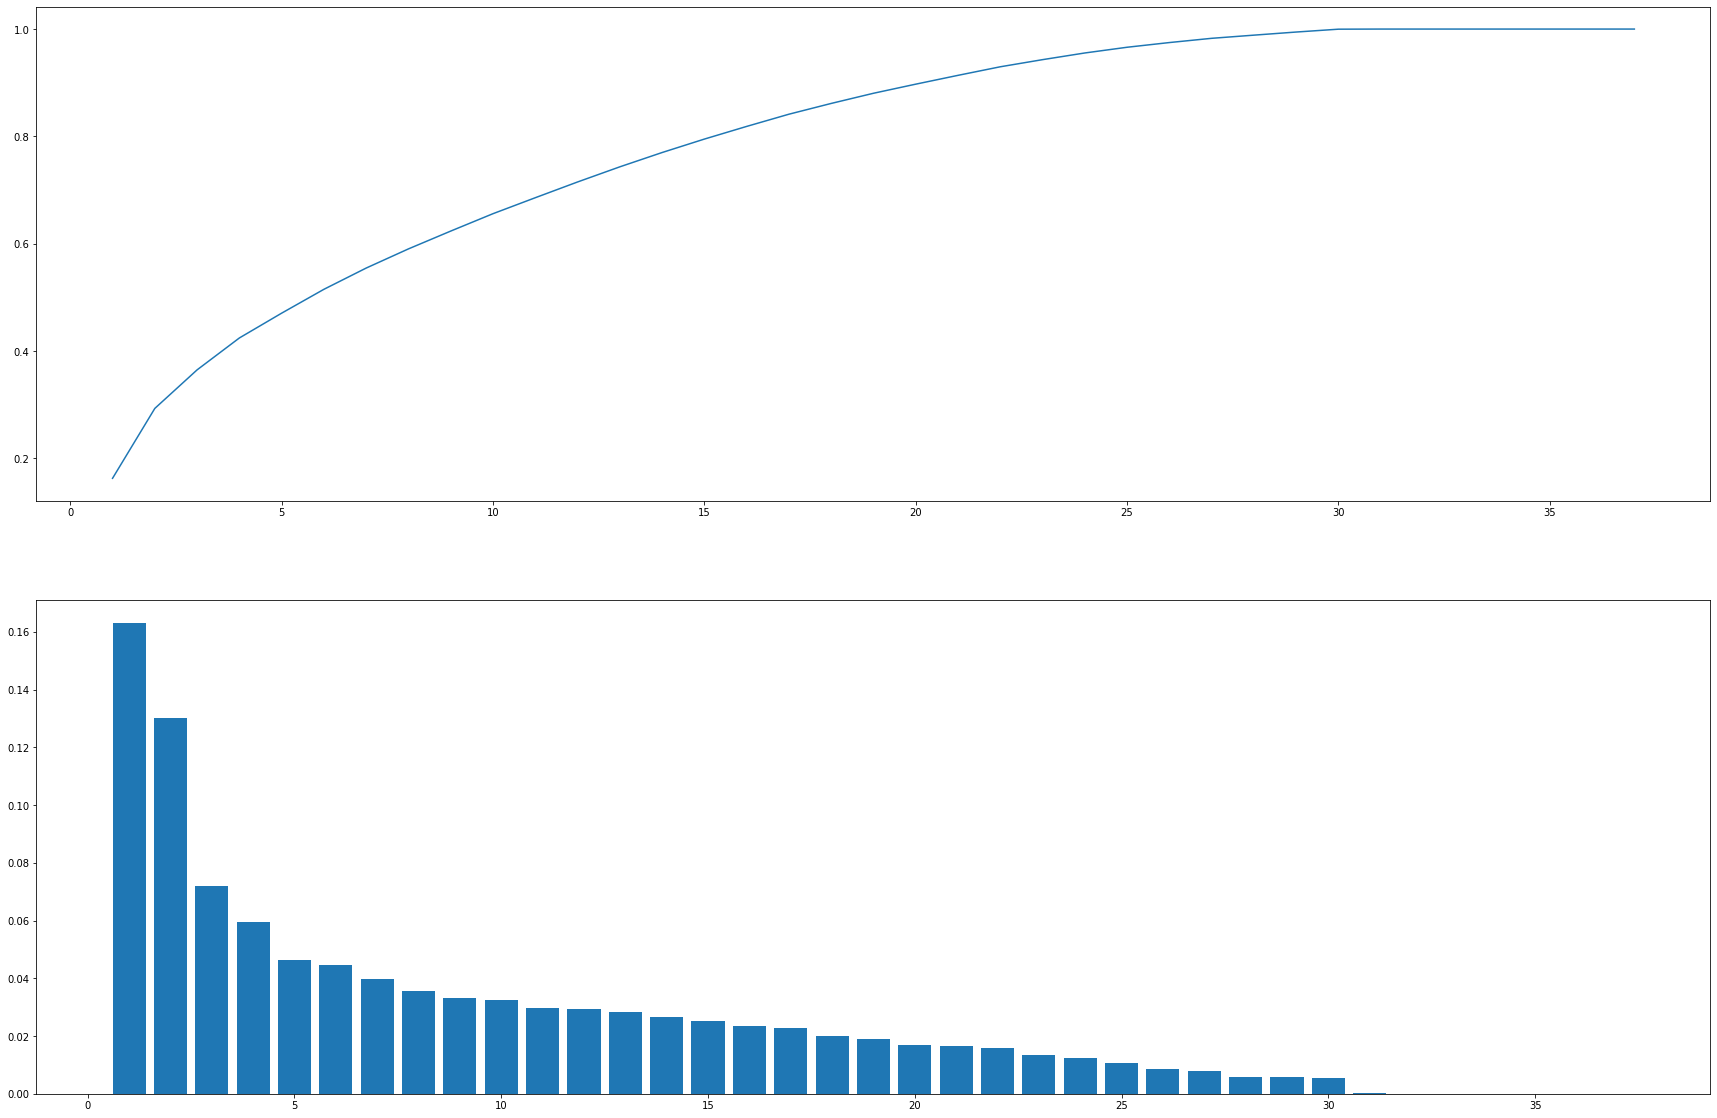

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


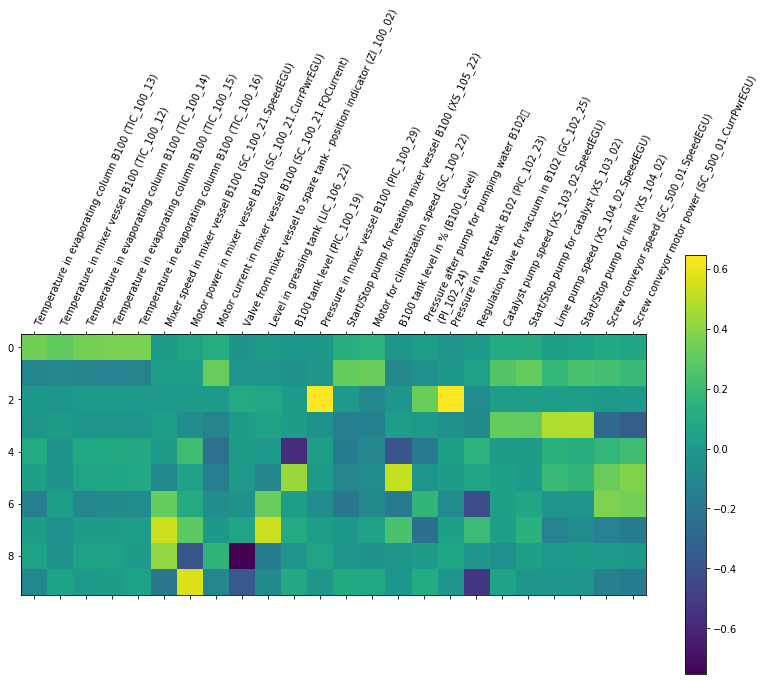

In [7]:
pca, pc = pca_for_columns(b100)
b100vis = Visualization(DATA_LOCATION, load=False, pc=pc, c=pca.components_, evr=pca.explained_variance_ratio_)
b100vis.draw_variance()
b100vis.draw_matrix(10, 0.3)

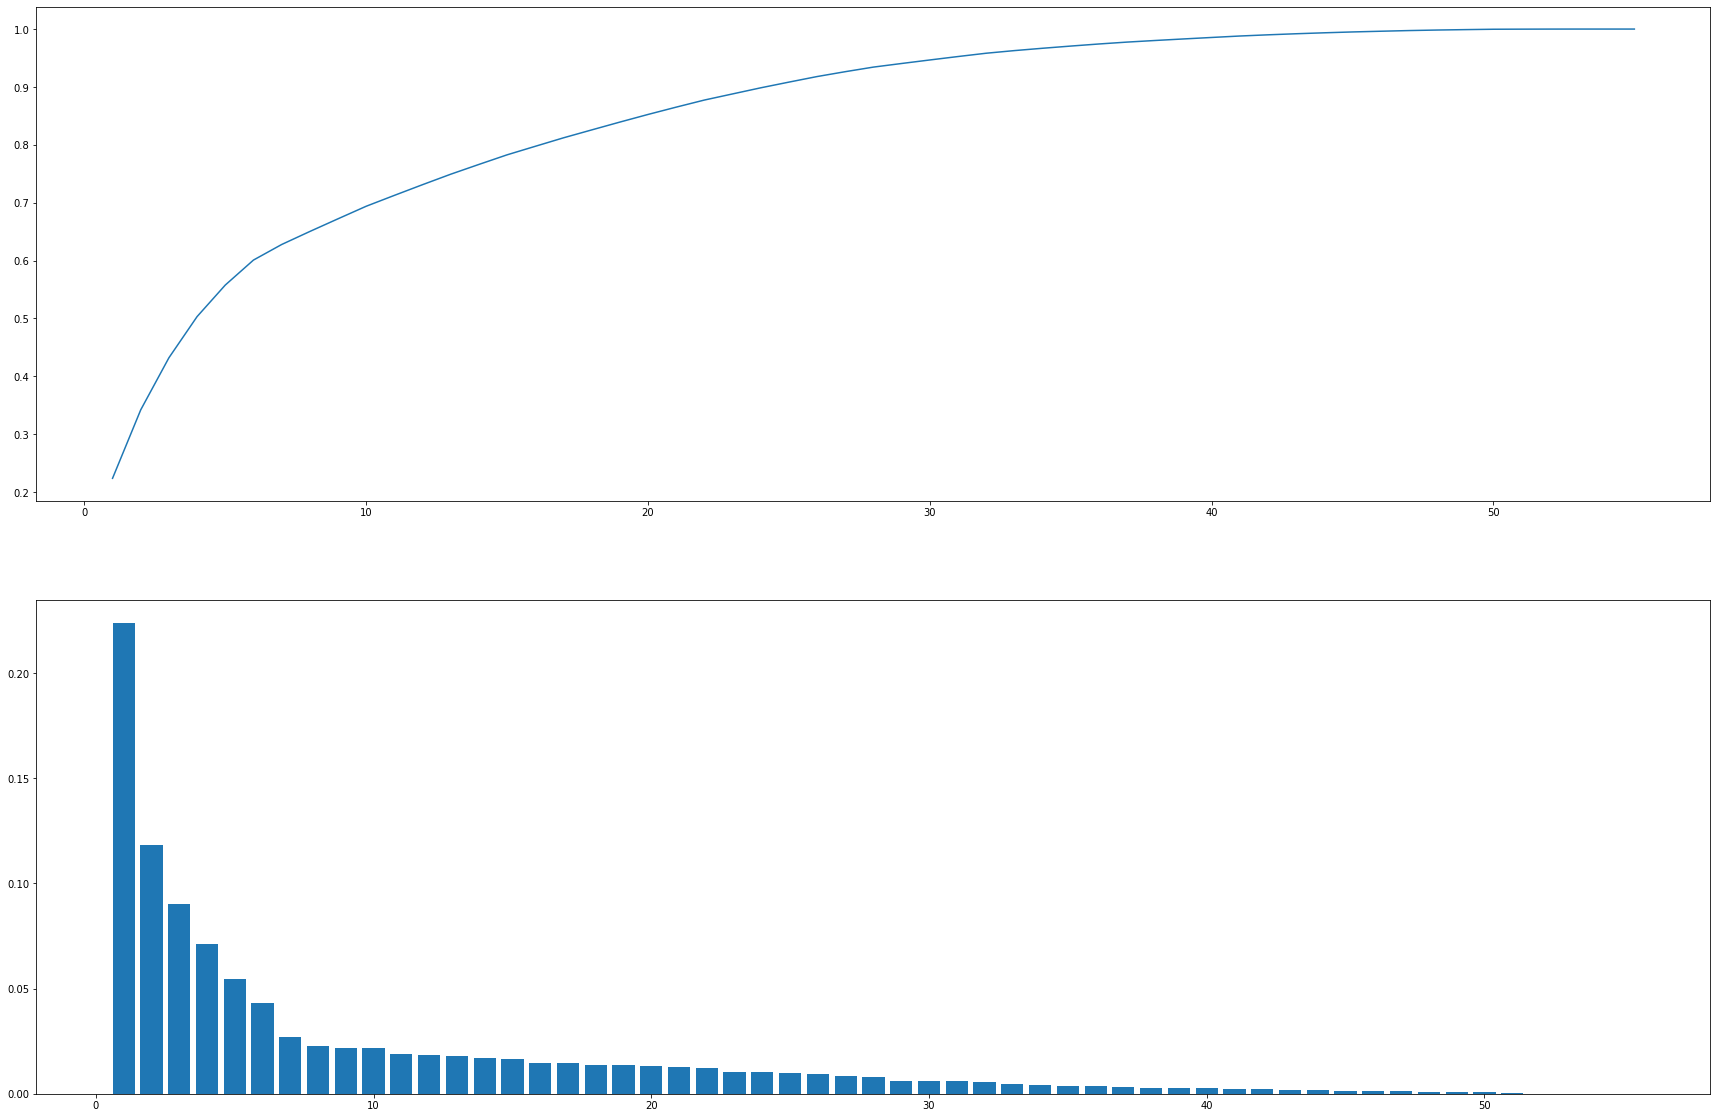

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


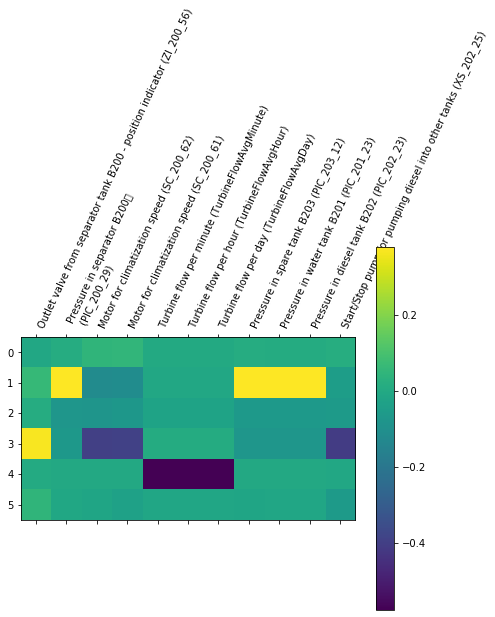

In [12]:
pca, pc = pca_for_columns(b200)
b200vis = Visualization(DATA_LOCATION, load=False, pc=pc, c=pca.components_, evr=pca.explained_variance_ratio_)
b200vis.draw_variance()
b200vis.draw_matrix(6, 0.35)

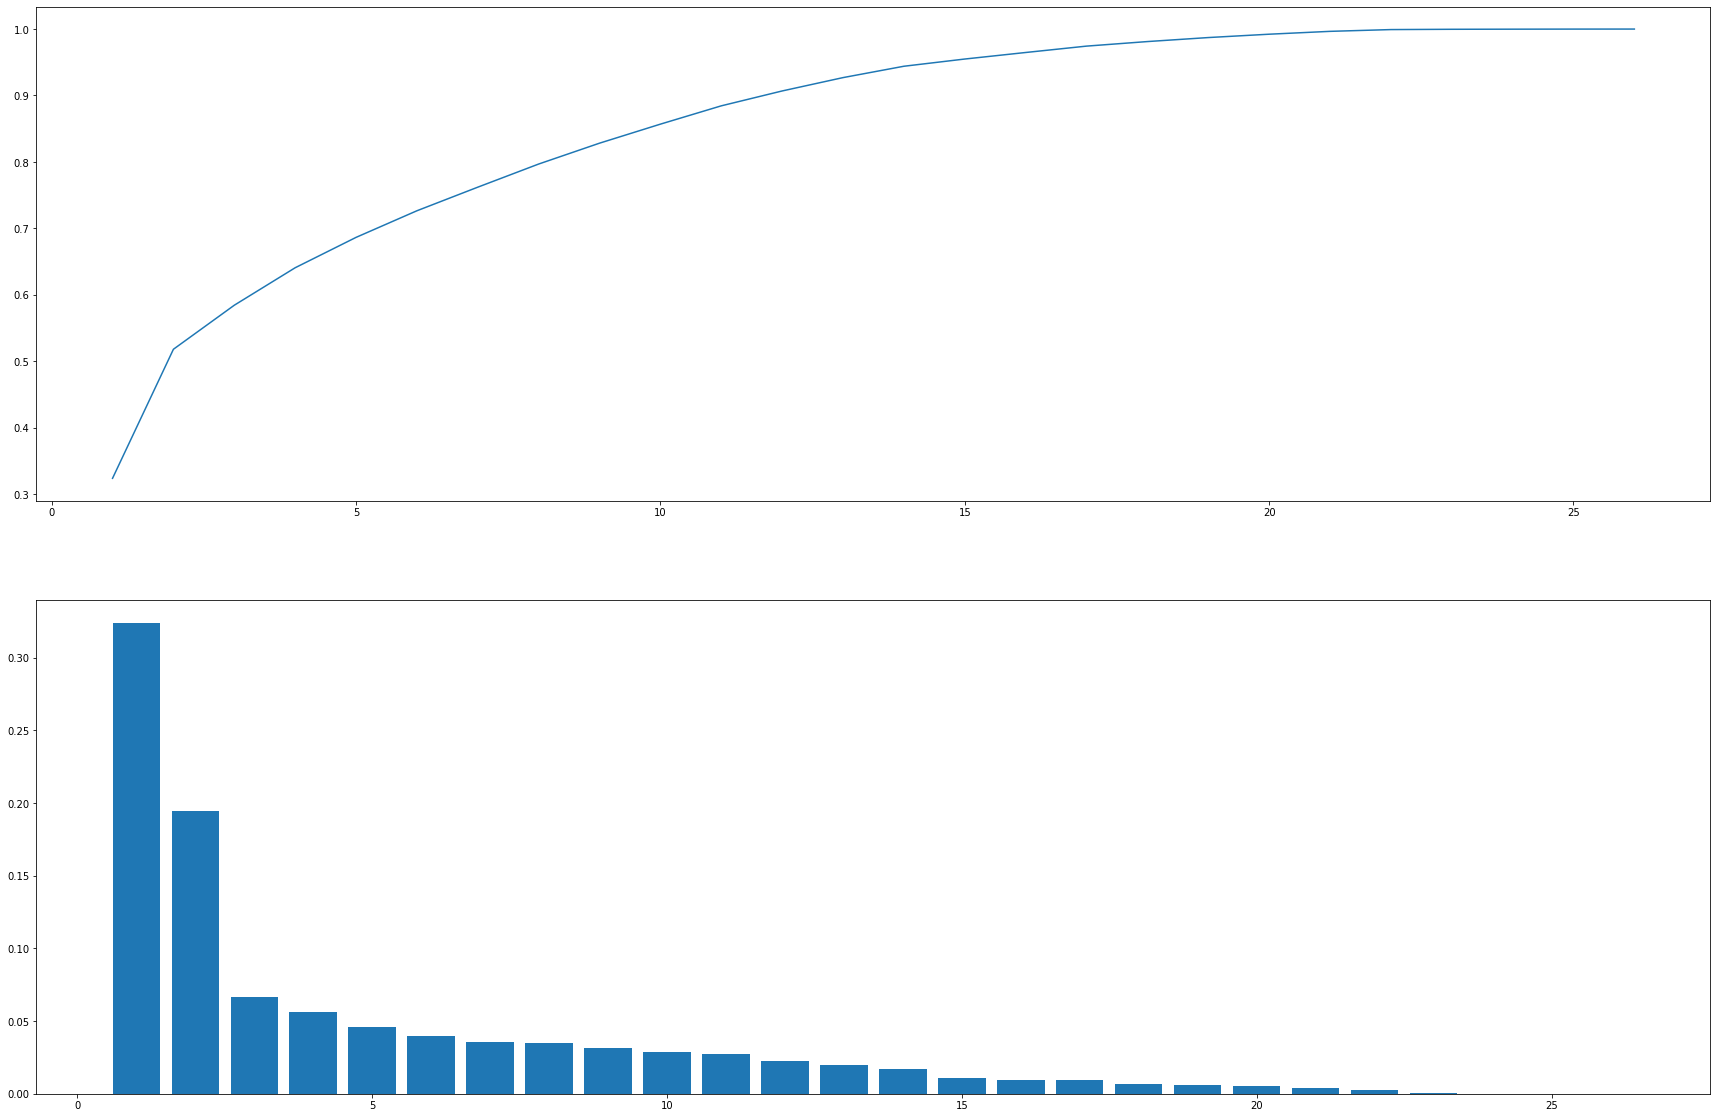

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


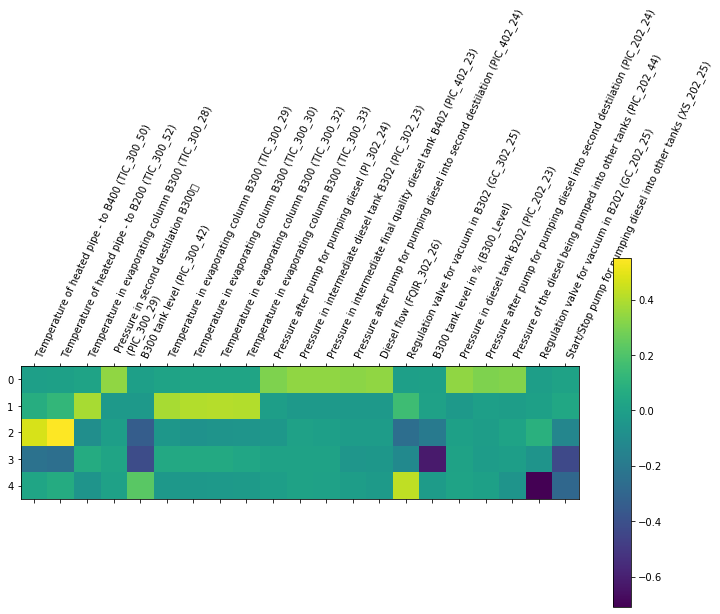

In [11]:
pca, pc = pca_for_columns(b300)
b300vis = Visualization(DATA_LOCATION, load=False, pc=pc, c=pca.components_, evr=pca.explained_variance_ratio_)
b300vis.draw_variance()
b300vis.draw_matrix(5, 0.3)